In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [19]:
df = pd.read_csv('veri-seti.txt', delimiter='\t')

In [20]:
df.head()

,PgnNum,PlasGlu,DiaBld,TriSkn,2HS,BdyMss,DiaPed,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
X = df.drop(columns=['Class'])
y = df['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=23)

In [22]:
nb = GaussianNB()
nb.fit(X_train, y_train)

# Test verisi üzerinde tahmin yapma
y_pred = nb.predict(X_test)

# Sonuçları değerlendirme
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [23]:
print(accuracy)

print(report)

0.7575757575757576
              precision    recall  f1-score   support

           0       0.81      0.82      0.81       148
           1       0.67      0.65      0.66        83

    accuracy                           0.76       231
   macro avg       0.74      0.73      0.74       231
weighted avg       0.76      0.76      0.76       231



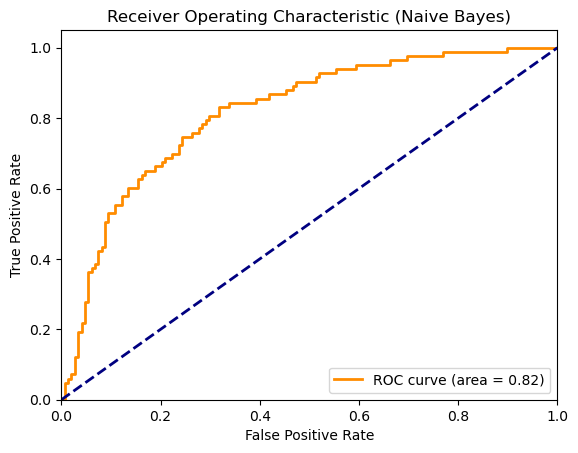

In [24]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# ROC curve
y_prob = nb.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Naive Bayes)')
plt.legend(loc="lower right")
plt.show()


In [25]:
print(conf_matrix)


[[121  27]
 [ 29  54]]
